In [14]:
import pandas as pd
import numpy as np
from scipy.special import expit

# Settings
np.random.seed(123)
n = 800  # Number of days
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")

# Categorical variables
product_types = ["Cougartail", "Chocolate Milk", "Hotdog"]
cities = ["Provo", "Springville", "Orem"]

# Generating categorical data
product_type_data = np.random.choice(product_types, n)
city_data = np.random.choice(cities, n)

# Time-dependent and categorical factors influencing sales
time_trend = np.linspace(0, 10, n)
X = np.random.normal(20 + time_trend, 5, n).round()
W = np.random.binomial(1, expit((X - X.mean()) / X.std())).astype(bool)

# Base sales level adjustments for simplicity
base_sales_product_type = {
    "Cougartail": 20 + np.random.normal(0, 2, 1),
    "Chocolate Milk": 30,
    "Hotdog": 25,
}
base_sales_city = {"Provo": 10, "Springville": 5, "Orem": 15}

# Temporal adjustments
day_of_week_adjustment = {
    "Monday": 0,
    "Tuesday": 0,
    "Wednesday": 0,
    "Thursday": 0,
    "Friday": 5 + np.random.normal(0, 2, 1),  # Adding randomness to Friday's adjustment
    "Saturday": 10
    + np.random.normal(0, 2, 1),  # Adding randomness to Saturday's adjustment
    "Sunday": 8 + np.random.normal(0, 2, 1),  # Adding randomness to Sunday's adjustment
}
quarter_adjustment = {1: 0, 2: 5, 3: 7, 4: 6}
holiday_adjustment = 20  # Additional sales for holidays
day_after_holiday_adjustment = 10  # Additional sales for the day after holidays

from pandas.tseries.holiday import USFederalHolidayCalendar

# Generate common US holidays for the year 2020
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start="2020-01-01", end="2022-12-31")

# Pre-calculations for temporal features
day_of_week = dates.day_name()
quarter = dates.quarter
is_holiday = dates.isin(holidays)
is_day_after_holiday = dates.shift(-1).isin(holidays)

# Generating sales with influences from all factors
sales = np.zeros(n)
for i in range(n):
    base_sales = (
        base_sales_product_type[product_type_data[i]]
        + base_sales_city[city_data[i]]
        + day_of_week_adjustment[day_of_week[i]]
        + quarter_adjustment[quarter[i]]
    )

    # Adjusting for holidays
    if is_holiday[i]:
        base_sales += holiday_adjustment
    elif is_day_after_holiday[i]:
        base_sales += day_after_holiday_adjustment

    sales[i] = np.random.normal(base_sales + 2 * X[i] + (-5 if W[i] else 5), 10)**2
# Creating the DataFrame
data = pd.DataFrame(
    {
        "Date": dates,
        "Sales": sales,
        "Product Type": product_type_data,
        "City": city_data,
        "X": X,
        "W": W,
        "Day of Week": day_of_week,
        "Quarter": quarter,
        "Holiday": is_holiday,
        "Day After Holiday": is_day_after_holiday,
    }
).set_index("Date")

data.to_csv("../outputs/sales_data.csv")
# Show the first few rows of the DataFrame
data.head()

C:\Users\tyler\AppData\Local\Temp\ipykernel_33412\2538953132.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sales[i] = np.random.normal(base_sales + 2 * X[i] + (-5 if W[i] else 5), 10)**2


,Sales,Product Type,City,X,W,Day of Week,Quarter,Holiday,Day After Holiday
Date,,,,,,,,,
2020-01-01,9669.391727,Hotdog,Springville,18.0,False,Wednesday,1,True,False
2020-01-02,8365.366831,Chocolate Milk,Orem,12.0,False,Thursday,1,False,True
2020-01-03,6438.289615,Hotdog,Springville,20.0,False,Friday,1,False,False
2020-01-04,5277.277672,Hotdog,Springville,14.0,True,Saturday,1,False,False
2020-01-05,5536.642021,Cougartail,Orem,18.0,False,Sunday,1,False,False


In [42]:
import pandas as pd
import numpy as np
from scipy.special import expit
from pandas.tseries.holiday import USFederalHolidayCalendar

# Settings
np.random.seed(1753)
n = 800  # Number of days
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")

# Categorical variables
product_types = ["A", "B", "C"]
cities = ["Provo", "Springville", "Orem"]
product_prices = {"A": 20, "B": 30, "C": 25}

# Influence weights with initial randomness
city_influence = {"Provo": 1.2, "Springville": 1.0, "Orem": 1.5}
product_type_influence = {"A": 1.0, "B": 1.2, "C": 1.1}
day_of_week_influence = {
    "Monday": 0.9,
    "Tuesday": 0.9,
    "Wednesday": 1.0,
    "Thursday": 1.0,
    "Friday": 1.2,
    "Saturday": 1.5,
    "Sunday": 1.3,
}
quarter_influence = {
    1: 1.0,
    2: 1.1,
    3: 1.2,
    4: 1.3,
}
day_after_holiday_influence = 1.3  # Increased transactions the day after a holiday

# Generate common US holidays
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=dates.min(), end=dates.max())

# Pre-calculations
day_of_week = dates.day_name()
quarter = dates.quarter
is_holiday = dates.isin(holidays)
is_day_after_holiday = dates.shift(-1).isin(
    holidays
)  # Shift to identify days after holidays

# Generating data
city_data = np.random.choice(cities, n)
product_type_data = np.random.choice(product_types, n)
sales = np.zeros(n)
transactions_per_day = np.zeros(n, dtype=int)

for i in range(n):
    city = city_data[i]
    product_type = product_type_data[i]
    dow = day_of_week[i]
    qtr = quarter[i]
    holiday = is_holiday[i]
    day_after_holiday = is_day_after_holiday[i]

    # Dynamically adjust influence weights
    daily_dow_influence = day_of_week_influence[dow] + np.random.uniform(-0.1, 0.2)
    daily_qtr_influence = quarter_influence[qtr] + np.random.uniform(-0.1, 0.2)

    # Randomly vary base transactions
    base_transactions = np.random.randint(150, 250)

    # Calculate transactions with all influences
    transactions = (
        base_transactions
        * city_influence[city]
        * product_type_influence[product_type]
        * daily_dow_influence
        * daily_qtr_influence
    )
    if holiday:
        transactions *= np.random.uniform(1.3, 1.5)
    elif day_after_holiday:
        transactions *= np.random.uniform(1.2, 1.4)

    # Random event
    if np.random.rand() < 0.05:
        transactions *= np.random.uniform(1.5, 2.0)

    transactions = np.round(transactions).astype(int)
    transactions_per_day[i] = transactions

    # Calculate sales with added noise
    for _ in range(transactions_per_day[i]):
        product = np.random.choice(list(product_prices.keys()))
        price_variation = np.random.uniform(0.9, 1.1)
        sales[i] += product_prices[product] * price_variation

# Creating the DataFrame
data = pd.DataFrame(
    {
        "Date": dates,
        "Sales": sales,
        "City": city_data,
        "Product Type": product_type_data,
        "Transactions": transactions_per_day,
        "Day of Week": day_of_week,
        "Quarter": quarter,
        "Holiday": is_holiday,
        "Day After Holiday": is_day_after_holiday,
    }
).set_index("Date")

# Display the first few rows of the DataFrame
data.head()

,Sales,City,Product Type,Transactions,Day of Week,Quarter,Holiday,Day After Holiday
Date,,,,,,,,
2020-01-01,7565.082144,Springville,C,302,Wednesday,1,True,False
2020-01-02,14798.207705,Orem,C,593,Thursday,1,False,True
2020-01-03,10874.711058,Orem,B,435,Friday,1,False,False
2020-01-04,11170.874033,Provo,B,443,Saturday,1,False,False
2020-01-05,7268.697739,Springville,A,292,Sunday,1,False,False


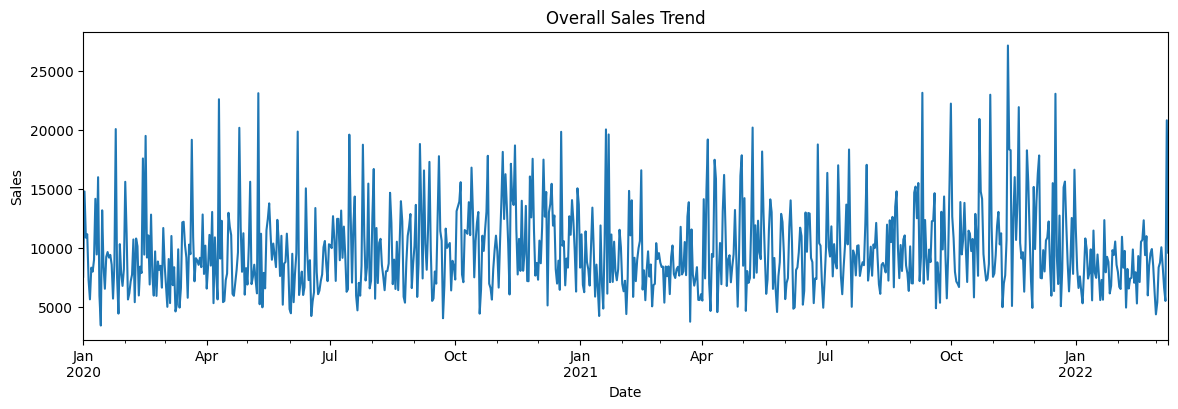

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Sales Trend
data["Sales"].plot(figsize=(14, 4))
plt.title("Overall Sales Trend")
plt.ylabel("Sales")
plt.show()

# # Sales by Product Type
# fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
# for i, product_type in enumerate(data["Product Type"].unique()):
#     data[data["Product Type"] == product_type]["Sales"].plot(ax=axes[i])
#     axes[i].set_title(f"Sales Trend for Product Type {product_type}")
# plt.show()


# # Sales by City
# fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
# for i, city in enumerate(data["City"].unique()):
#     data[data["City"] == city]["Sales"].plot(ax=axes[i])
#     axes[i].set_title(f"Sales Trend for City {city}")
# plt.show()

Mean Squared Error: 7403.195314991375


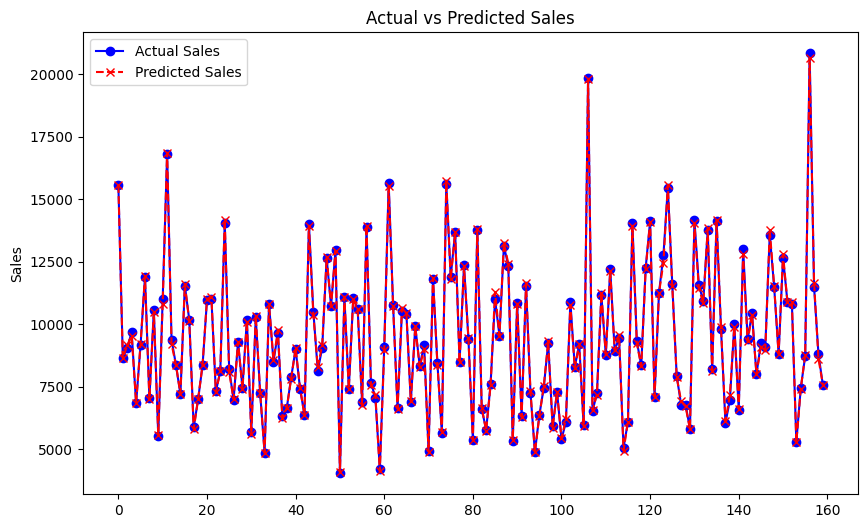

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparing the data
X = data.drop("Sales", axis=1)
y = data["Sales"]

# One-hot encoding for categorical variables
categorical_features = ["Product Type", "City", "Day of Week", "Quarter", "Holiday", "Day After Holiday"]
one_hot_encoder = OneHotEncoder()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[("cat", one_hot_encoder, categorical_features)],
    remainder="passthrough",
)

# Pipeline with preprocessing and model
model = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the model
model.fit(X_train, y_train)


# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted sales for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Sales", color="blue", marker="o")
plt.plot(y_pred, label="Predicted Sales", color="red", linestyle="--", marker="x")
plt.title("Actual vs Predicted Sales")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [45]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_dummy = pd.get_dummies(
    columns=data.select_dtypes(include="object").columns, data=data, drop_first=True
).astype(int)

y = df_dummy["Sales"]
X = df_dummy.drop(columns=["Sales"]).assign(
    const=1
)  # Automatic way to get numeric columns


model = sm.OLS(y, X).fit()  # Ordinary Least Squares

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.951e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:07:50   Log-Likelihood:                -4694.9
No. Observations:                 800   AIC:                             9420.
Df Residuals:                     785   BIC:                             9490.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Transactions             24.96